In [20]:
#library
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model  import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler , StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

Load Data

In [2]:
# load data
diabetes = pd.read_csv('diabetes_binary_health_indicators_BRFSS2015.csv')

checking data anomalies

In [3]:
#informasi data
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [4]:
#null data
diabetes.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [5]:
#unique value data
unique_values = {}
for col in diabetes.columns:
    unique_values[col] = diabetes[col].value_counts().shape[0]

pd.DataFrame(unique_values, index=['unique value count']).transpose()

,unique value count
Diabetes_binary,2
HighBP,2
HighChol,2
CholCheck,2
BMI,84
Smoker,2
Stroke,2
HeartDiseaseorAttack,2
PhysActivity,2
Fruits,2


In [6]:
#duplicated data
diabetes.duplicated().sum()

24206

Data Cleaning

In [7]:
#drop duplicated data
diabetes.drop_duplicates(inplace=True)

In [8]:
#check duplicated data
diabetes.duplicated().sum()

0

In [9]:
#data info after cleaning
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 229474 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       229474 non-null  float64
 1   HighBP                229474 non-null  float64
 2   HighChol              229474 non-null  float64
 3   CholCheck             229474 non-null  float64
 4   BMI                   229474 non-null  float64
 5   Smoker                229474 non-null  float64
 6   Stroke                229474 non-null  float64
 7   HeartDiseaseorAttack  229474 non-null  float64
 8   PhysActivity          229474 non-null  float64
 9   Fruits                229474 non-null  float64
 10  Veggies               229474 non-null  float64
 11  HvyAlcoholConsump     229474 non-null  float64
 12  AnyHealthcare         229474 non-null  float64
 13  NoDocbcCost           229474 non-null  float64
 14  GenHlth               229474 non-null  float64
 15  

Text(0.5, 1.0, 'Correlation')

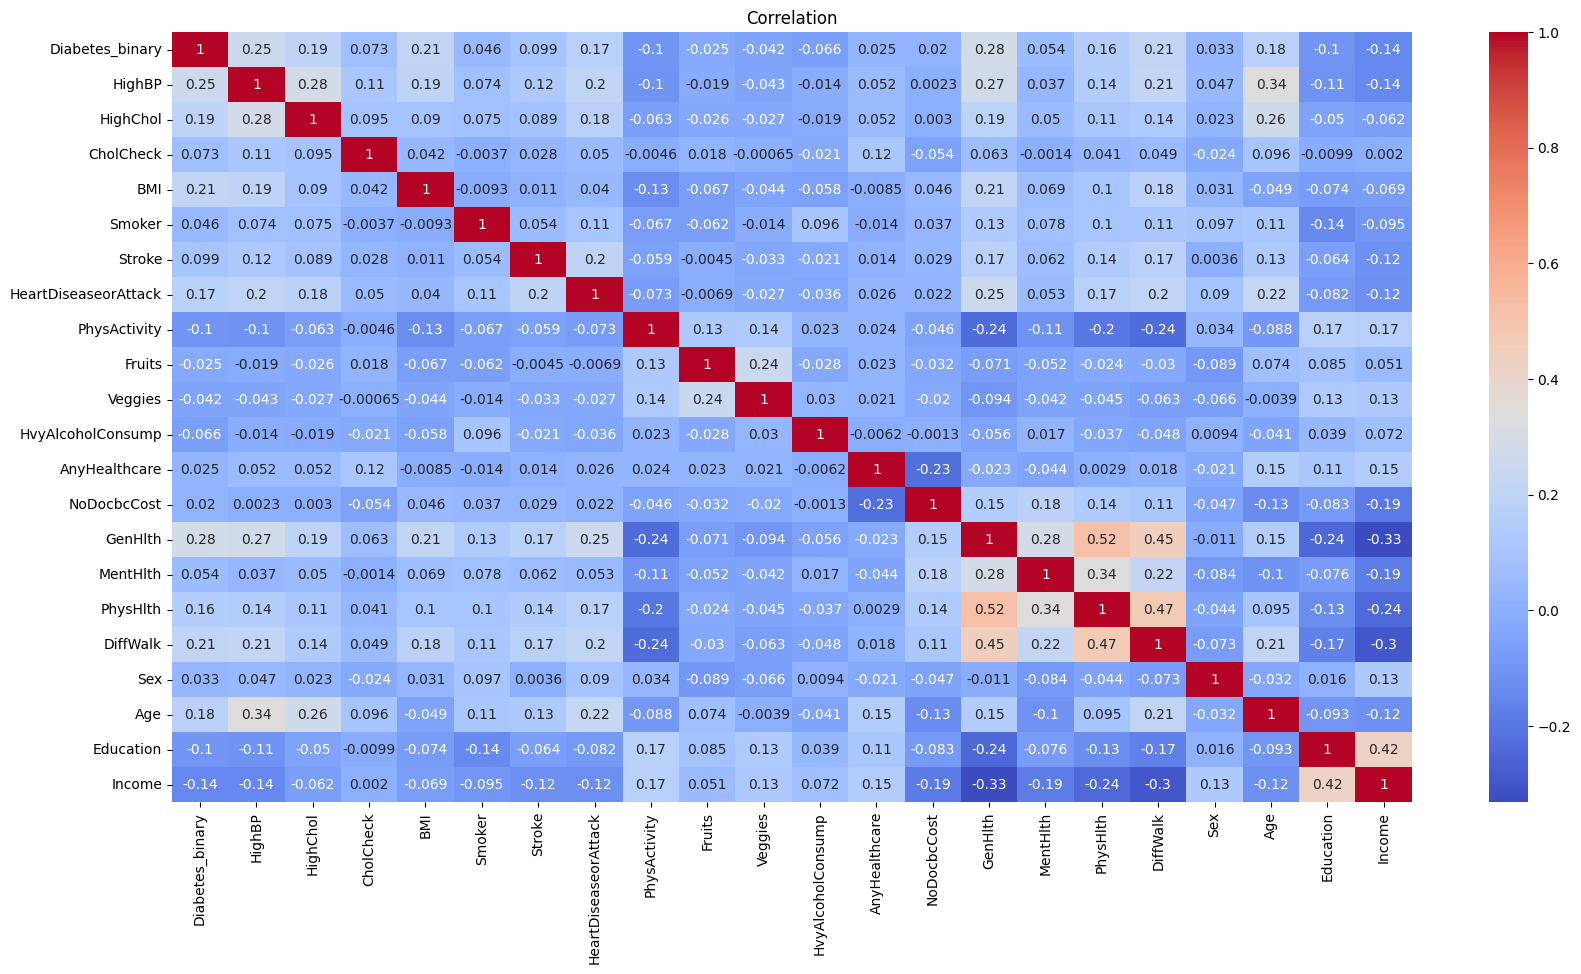

In [10]:
plt.figure(figsize = (20,10))
sns.heatmap(diabetes.corr(),annot=True , cmap='coolwarm')
plt.title("Correlation")

Data Selection

In [11]:
# x = diabetes.drop(columns={'Income','Education','Fruits','Veggies','Diabetes_binary'})
x = diabetes.drop('Diabetes_binary',axis =1)
y = diabetes['Diabetes_binary']

In [12]:
y.value_counts()

0.0    194377
1.0     35097
Name: Diabetes_binary, dtype: int64

In [13]:
from imblearn.under_sampling import NearMiss
x,y= NearMiss(version = 1 , n_neighbors = 10).fit_resample(x,y)

In [14]:
y.shape , x.shape

((70194,), (70194, 21))

Data Transformation

In [15]:
#standarization
S_Scaler = StandardScaler().fit(x)
X_standar_transformed = S_Scaler.transform(x)
print(X_standar_transformed)

[[ 0.75357832  0.83210602  0.09064102 ... -0.1732292   0.99974688
   0.95139575]
 [ 0.75357832  0.83210602  0.09064102 ...  0.72641942  0.99974688
   0.95139575]
 [ 0.75357832  0.83210602  0.09064102 ...  1.17624373  0.99974688
   0.95139575]
 ...
 [ 0.75357832  0.83210602  0.09064102 ...  1.62606804  0.99974688
  -1.02290706]
 [ 0.75357832  0.83210602  0.09064102 ...  0.72641942 -3.08359029
  -1.02290706]
 [ 0.75357832  0.83210602  0.09064102 ... -0.1732292   0.99974688
  -2.01005847]]


Data Mining

In [16]:
#model
x_train,x_test,y_train,y_test = train_test_split(X_standar_transformed,y,test_size=0.2,random_state=123)

#decision tree
tree_model = DecisionTreeClassifier(max_depth=15)
tree_model = tree_model.fit(x_train, y_train)
tree_y_pred = tree_model.predict(x_test)

#Logistic Regression
Logistic_model = LogisticRegression().fit(x_train,y_train)
Logistic_y_pred = Logistic_model.predict(x_test)

#XGBoost
Xgboost_model = XGBClassifier(eval_metric= 'error', learning_rate= 0.3).fit(x_train,y_train)
XG_y_pred = Xgboost_model.predict(x_test)

Pattern Evaluation

In [17]:
#accuracy

#decision tree
score_decisionTree = round(accuracy_score(tree_y_pred,y_test),3)
print("Decision Tree Accuracy: ", score_decisionTree)
score_Logistic = round(accuracy_score(Logistic_y_pred,y_test),3)
print("Logistic Regression Accuracy: ", score_Logistic)
score_Xg = round(accuracy_score(XG_y_pred,y_test),3)
print("XGboost Accuracy: ", score_Xg)

Decision Tree Accuracy:  0.851
Logistic Regression Accuracy:  0.852
XGboost Accuracy:  0.871


Visualization

<Figure size 500x400 with 0 Axes>

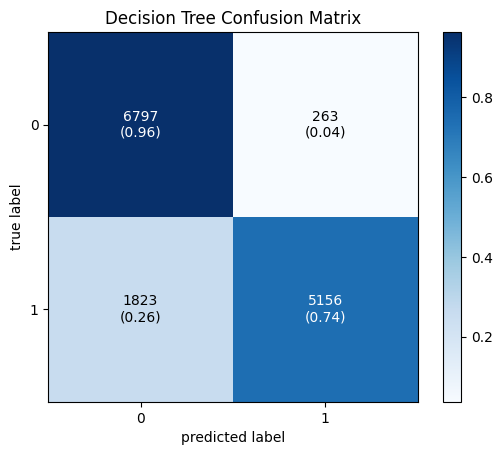

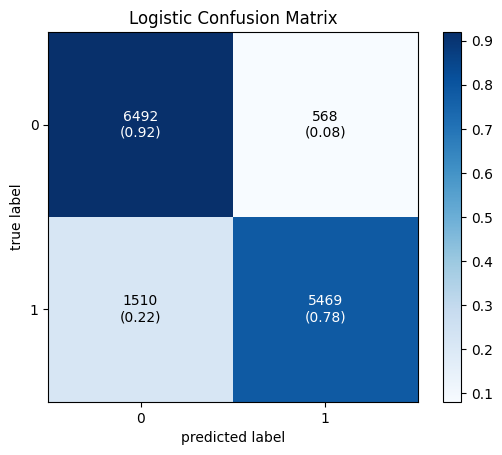

<Figure size 500x400 with 0 Axes>

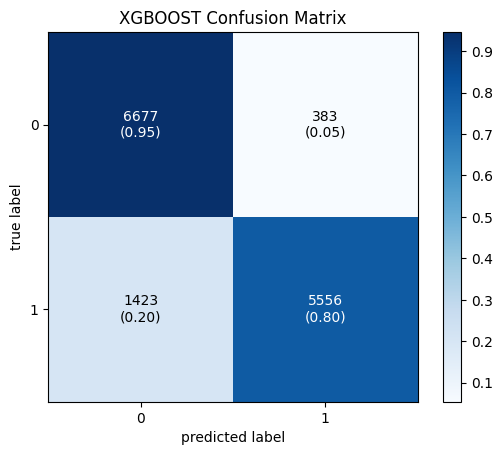

In [21]:
# Decision Tree Confusion Matrix
tree_cm = confusion_matrix(y_test, tree_y_pred)
plt.figure(figsize=(5, 4))
plot_confusion_matrix(conf_mat=tree_cm,show_absolute=True,show_normed=True,colorbar=True)
plt.title('Decision Tree Confusion Matrix')

plt.show()

# Logistic Regression Confusion Matrix
logistic_cm = confusion_matrix(y_test, Logistic_y_pred)
plot_confusion_matrix(conf_mat=logistic_cm,show_absolute=True,show_normed=True,colorbar=True)
plt.title('Logistic Confusion Matrix')
plt.show()

# XGBoost Confusion Matrix
xgboost_cm = confusion_matrix(y_test, XG_y_pred)
plt.figure(figsize=(5, 4))
plot_confusion_matrix(conf_mat=xgboost_cm,show_absolute=True,show_normed=True,colorbar=True)
plt.title('XGBOOST Confusion Matrix')
plt.show()
